
# Project: Investigate a Dataset - [TMDb movie data ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The IMDb movie dataset contains detailed information about movies, including features like budget, revenue, cast, director, genres, and user ratings. It also includes inflation-adjusted financial data and popularity metrics. I aim to explore this dataset further to uncover intriguing patterns and insights.








### Question(s) for Analysis
    -1 Which months have higher profits?
    -2 How Does Popularity Depends on Profit?
    -3 Which Genre Has The Highest Release Of Movies?
    -4 Which year has the highest release of movies?
    -5 Which years do movies made the most profits?




In [132]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [133]:

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [135]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [136]:
# see how much the 0 values in
print (df[df['budget']==0].shape)
print (df[df['revenue']==0].shape)

(5696, 21)
(6016, 21)


    Considering that there are 5,696 and 6,016 occurrences of 0 values in the budget and revenue columns, which is quite significant, I've decided to drop the movies with zero values in both the budget and revenue columns instead of filling them with the mean, as this could negatively affect the data

    Popularity and vote data: The popularity and vote counts suggest that only a small subset of movies achieve widespread recognition and high vote numbers.

In [137]:
# drop the rows with 0 value in budget,revenue 
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.dropna(inplace =True)

In [138]:
# fill null value with 0
df1=df.fillna(0)



### Data Cleaning

 

#### 1-delete duplicated values

In [139]:
sum(df.duplicated())


0

In [140]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(1287, 21)

#### 2- delete unnecessary columns

In [141]:
df.drop([ 'imdb_id', 'homepage', 'keywords', 'tagline',
                              'overview','budget_adj','revenue_adj'], axis=1, inplace=True)

In [142]:
df.shape

(1287, 14)

In [143]:
# Splitting Cast and Genres Columns into Lists
df['cast'] = df['cast'].str.split('|')
df['genres'] = df['genres'].str.split('|')


#### 3- fill the missing values for the cast ,director ,genres and production_companies

In [144]:
# fill with the most common director
most_common_director = df['director'].mode()[0]
df['director'].fillna(most_common_director, inplace=True)

In [145]:
# fill based on the director
df['production_companies'] = df.groupby('director',group_keys=False)['production_companies'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [146]:
# fill genres based on the director
df['genres'] = df.groupby('director')['genres'].transform(
    lambda x: x.apply(lambda y: y if isinstance(y, list) else x.mode()[0] if not x.mode().empty else ['Unknown'])
)

In [147]:
# fill cast based on director
df['cast'] = df.groupby('director')['cast'].transform(
    lambda x: x.apply(lambda y: y if isinstance(y, list) else x.mode()[0] if not x.mode().empty else ['Unknown'])
)


In [148]:
# how null values we have
print(df.isna().sum()) 


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64


#### 4- change data type

In [149]:
# retype the data type for the release_date
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # convert to datetime


In [150]:
df.shape

(1287, 14)

### plot graph function

In [151]:

def plot_graph(x, y, title="Graph", xlabel="X-axis", ylabel="Y-axis", 
               plot_type="line", color="b", linestyle="-", marker=None, months=None, alpha=None):
   
    # Create a new figure with a specified size
    plt.figure(figsize=(8, 6))
    # Check the plot type
    if plot_type == "line":
        plt.plot(x, y, color=color, linestyle=linestyle, marker=marker)
    elif plot_type == "scatter":
        plt.scatter(x, y, color=color, marker=marker, alpha=alpha)  # Only apply alpha for scatter plot
    elif plot_type == "bar":
        plt.bar(x, y, color=color)
        if months:
            plt.xticks(ticks=np.arange(len(months)), labels=months)
    else:
        print(f"Unsupported plot type: {plot_type}")
        return
    # Set the title, x-axis label, and y-axis label
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()  
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis





### Research Question 1 (Which months have higher profits?)

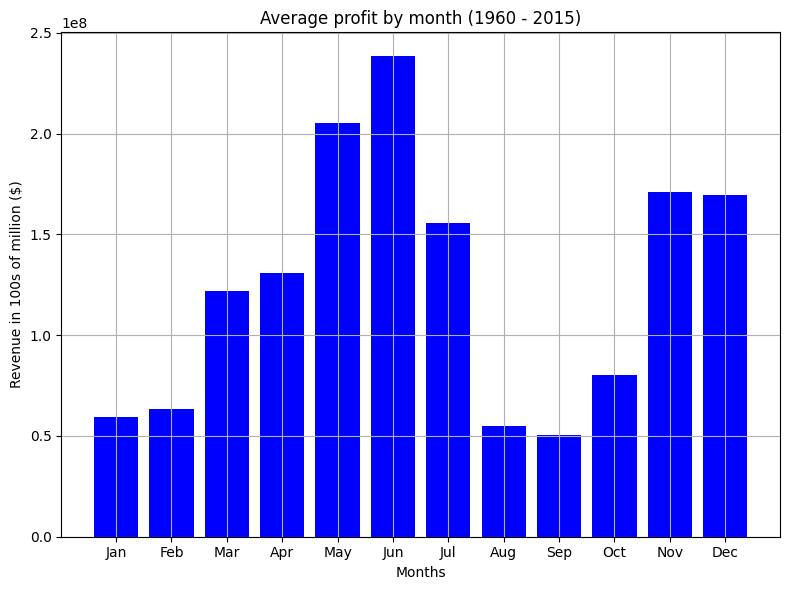

In [152]:
# Extract the profit in a new column
df['profit'] = df['revenue'] - df['budget']
# Extract the month of release for every movie in a new column
df['release_month']=df['release_date'].dt.month

# Group the data by 'release_month' and calculate the average profit for each month
profit_by_month = df.groupby('release_month')['profit'].mean()

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plot_graph(
    x=np.arange(0, 12),  
    y=profit_by_month,   
    title='Average profit by month (1960 - 2015)',
    xlabel='Months',
    ylabel='Revenue in 100s of million ($)',
    plot_type='bar',     
    color='b',           
    marker=None,         
    linestyle=None,      
    months=months        
)

    The bar chart proves the fact that movie are sold more during summar and winter breaks. It makes sense that people have school off and holidays during these time.
    

### Research Question 2  (How Does Popularity Depends On Profit?)

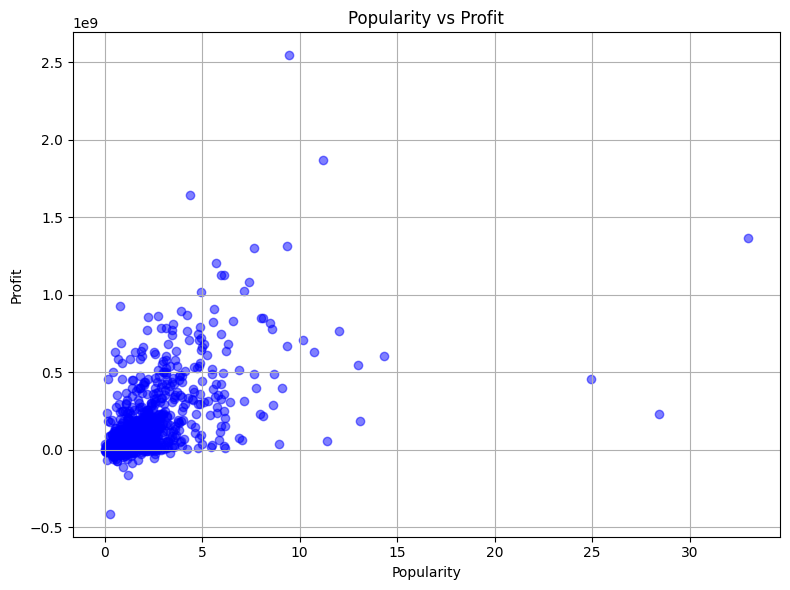

Correlation between Popularity and Profit: 0.5820644762668438


In [153]:
# use plot graph function
plot_graph(
    x=df['popularity'],       
    y=df['profit'],           
    title='Popularity vs Profit', 
    xlabel='Popularity',      
    ylabel='Profit',         
    plot_type='scatter',     
    color='blue',             
    marker='o',               
    alpha=0.5                 
)
# Calculate correlation coefficient
correlation = df['popularity'].corr(df['profit'])
print(f"Correlation between Popularity and Profit: {correlation}")

    Looking at the scatter plot, it's clear that there is a general positive trend between popularity and profit,indicating that as popularity increases, profit tends to rise as well. The correlation coefficient confirms this positive relationship. However, the relatively low value of the correlation suggests that the relationship isn't very strong, which could be due to cases such as movies with high budgets but low profits, or other outliers that don't follow the general trend.


### Research Question 3  (Which Genre Has The Highest Release Of Movies?)

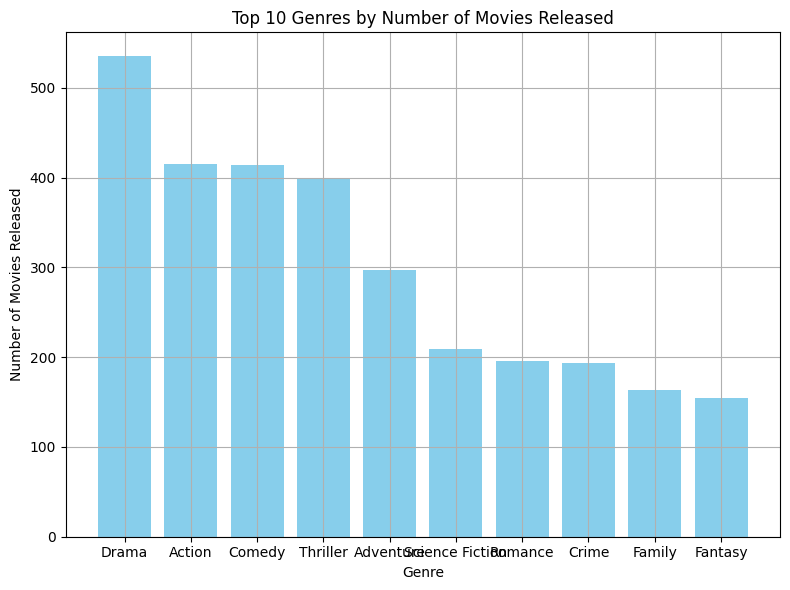

In [154]:
# Exploding the genres column into individual rows
genres_splitted = df.explode('genres')
# Counting the occurrences of each genre
genre_counts = genres_splitted['genres'].value_counts()

# Prepare the data for the plot
top_10_genres = genre_counts.head(10)

plot_graph(
    x=top_10_genres.index,        
    y=top_10_genres.values,      
    title='Top 10 Genres by Number of Movies Released', 
    xlabel='Genre',               
    ylabel='Number of Movies Released',  
    plot_type='bar',             
    color='skyblue',              
    marker=None,                  
    linestyle=None                
)

    According to the plot Drama genre has the highest release of movies followed by Action and Comedy.



### Research Question 4 (Which year has the highest release of movies?)


The year with the highest number of movie releases is 2011 with 156 movies.


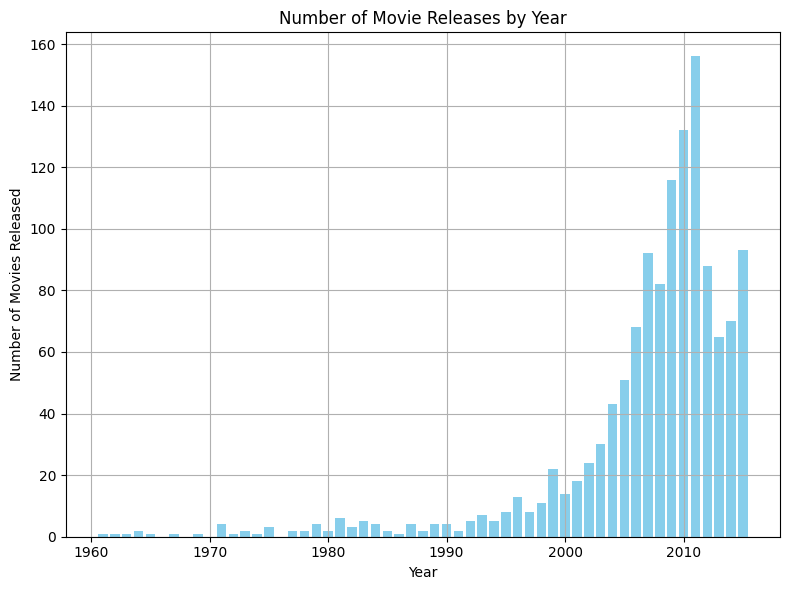

In [155]:
# Grouping the data by release year to count the number of movie releases per year
movies_per_year = df.groupby('release_year').size()

# Prepare the data for the plot
# 'years' will be the index (release years),
# 'movie_counts' will be the number of movie releases per year
years = movies_per_year.index
movie_counts = movies_per_year.values
# Find the year with the highest number of movie releases
highest_releases_year = movies_per_year.idxmax()
highest_releases_count = movies_per_year.max()

print(f"The year with the highest number of movie releases is {highest_releases_year} with {highest_releases_count} movies.")

plot_graph(
    x=years,                      
    y=movie_counts,                
    title='Number of Movie Releases by Year',  
    xlabel='Year',                
    ylabel='Number of Movies Released',  
    plot_type='bar',              
    color='skyblue',               
    marker=None,                   
    linestyle=None                
)

    After Seeing the plot and the output we can conclude that year 2011 year has the highest release of movies followed by year 2010 and year 2009.

### Research Question 5 (Which years do movies made the most profits?)


The year with the highest total profit is 2015 with a total profit of 16531677567.0.


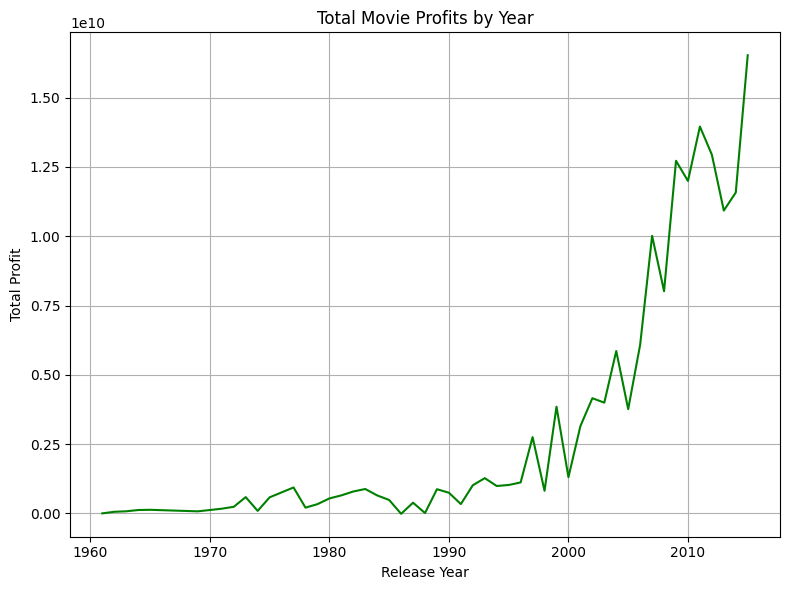

In [156]:
# Group the data by 'release_year' and sum the profit for each year
profit_per_year = df.groupby('release_year')['profit'].sum()
# Find the year with the highest total profit and the corresponding value
year_max_profit = profit_per_year.idxmax()
max_profit = profit_per_year.max()

print(f"The year with the highest total profit is {year_max_profit} with a total profit of {max_profit}.")
years = profit_per_year.index
profits = profit_per_year.values

plot_graph(
    x=years,                      
    y=profits,                   
    title='Total Movie Profits by Year',  
    xlabel='Release Year',       
    ylabel='Total Profit',        
    plot_type='line',            
    color='green',                
    linestyle='-',                
    marker=None                   
)


    The plot shows a clear upward trend in profits over the years, indicating that movie profits have generally increased as time has passed.

<a id='conclusions'></a>
## Conclusions
<ul>
<li> Top Profit Months: June, May, and December are the months with the highest movie profits, likely due to blockbuster releases in summer and the holiday season.
</li>
<li> Profit Drivers: Profits are closely linked to both the budget and popularity of movies—bigger budgets and more popular films tend to make more money.
</li>
<li> Most Common Genres: Drama, Action, Comedy and Thriller and Drama are the most common genres, reflecting what audiences tend to watch the most.
</li>
<li> Year with Most Releases: 2011 saw the highest number of movie releases, with 156 films, followed by 2010 and 2009.</li>
<li> Highest Total Profit: 2015 had the highest total profit, earning over 16 billion, driven by major blockbusters and strong global performances.
</li>
</ul>
      
    
    
    

## Limitations:
    Missing Data: The analysis may be affected by missing or incomplete data in columns like cast, genres and diretor, which could lead to biased results or skewed insights.

    Limited Scope: The dataset focuses on a specific time period (1960-2015) and may not fully capture current trends or future industry shifts.
    
    Zero Values : There are rows with 0 values in columns like budget and revenue, which could distort the analysis, especially when calculating profitability or analyzing trends in movie performance.

In [27]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb:
